In [2]:
%pylab inline

from __future__ import division

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.collections import PatchCollection

from ipywidgets import interact, HTML, FloatSlider
from IPython.display import clear_output, display

import numba as nb
import time

Populating the interactive namespace from numpy and matplotlib


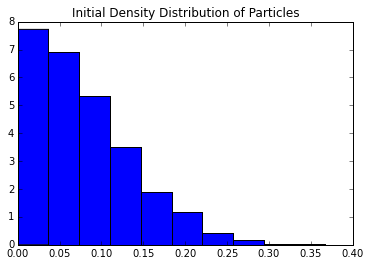

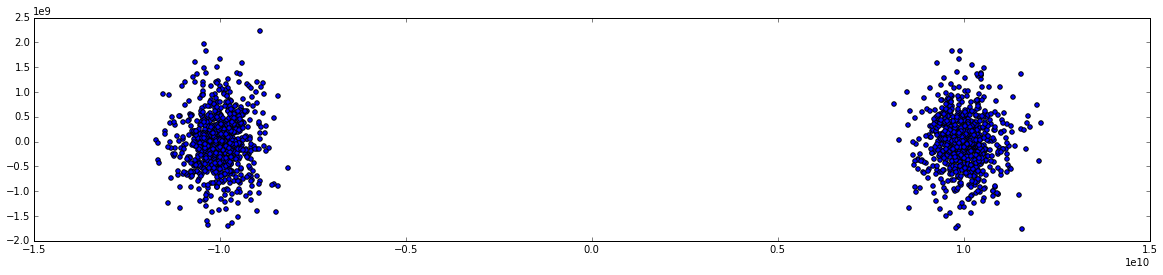

In [18]:
RJupiter = 6.99e9
RFinal = 1e10
lower, upper = 0, 1
mu, sigma = 0, 0.1
X = stats.truncnorm(
    (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
plt.hist(X.rvs(10000), normed=True)

nParticles = 1000
radiusDistribution1 = X.rvs(nParticles) * RJupiter
radiusDistribution2 = X.rvs(nParticles) * RJupiter
thetaDistribution1 = np.random.uniform(0, 2*np.pi, size=nParticles)
thetaDistribution2 = np.random.uniform(0, 2*np.pi, size=nParticles)

# plt.figure(figsize=(10,10))
# plt.scatter(radiusDistribution*np.cos(thetaDistribution), \
#             radiusDistribution*np.sin(thetaDistribution))
plt.title("Initial Density Distribution of Particles")
#plt.xlim(-2e9,2e9)
#plt.ylim(-2e9,2e9)

# Convert to Cartesian Position
def polar2cart(r, theta):
    return np.array([r*np.cos(theta), r*np.sin(theta)]).T

xyDistributionRight = polar2cart(radiusDistribution1, thetaDistribution1)
xyDistributionRight[:,0] += 1*RFinal
xyDistributionLeft = polar2cart(radiusDistribution2, thetaDistribution2)
xyDistributionLeft[:,0] -= 1*RFinal

plt.figure(figsize=(20,4))
plt.scatter(xyDistributionRight[:,0], xyDistributionRight[:,1])
plt.scatter(xyDistributionLeft[:,0], xyDistributionLeft[:,1])

